# Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 2: Import Dataset

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

encoder = OneHotEncoder()
Y = encoder.fit_transform(y.reshape(-1, 1)).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Step 3: Define the Neural Network

In [3]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dims, output_dim, lr=0.01):
        self.lr = lr
        h1, h2, h3 = hidden_dims


        self.W1 = np.random.randn(input_dim, h1) * np.sqrt(2.0 / input_dim)
        self.W2 = np.random.randn(h1, h2) * np.sqrt(2.0 / h1)
        self.W3 = np.random.randn(h2, h3) * np.sqrt(2.0 / h2)
        self.W4 = np.random.randn(h3, output_dim) * np.sqrt(2.0 / h3)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = X.dot(self.W1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1.dot(self.W2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.a2.dot(self.W3)
        self.a3 = self.sigmoid(self.z3)

        self.z4 = self.a3.dot(self.W4)
        self.out = self.softmax(self.z4)
        return self.out

    def backprop(self, X, Y, preds):
        delta4 = preds - Y
        delta3 = np.asarray(delta4.dot(self.W4.T)) * self.sigmoid(self.a3, der=True)
        delta2 = np.asarray(delta3.dot(self.W3.T)) * self.sigmoid(self.a2, der=True)
        delta1 = np.asarray(delta2.dot(self.W2.T)) * self.sigmoid(self.a1, der=True)


        self.W4 -= self.lr * self.a3.T.dot(delta4)
        self.W3 -= self.lr * self.a2.T.dot(delta3)
        self.W2 -= self.lr * self.a1.T.dot(delta2)
        self.W1 -= self.lr * X.T.dot(delta1)

# Step 4: Train the Model

In [7]:
input_dim, h1, h2, h3, output_dim = 4, 16, 12, 8, 3
lr = 0.01

W1 = np.random.randn(input_dim, h1) * np.sqrt(2.0 / input_dim)
W2 = np.random.randn(h1, h2) * np.sqrt(2.0 / h1)
W3 = np.random.randn(h2, h3) * np.sqrt(2.0 / h2)
W4 = np.random.randn(h3, output_dim) * np.sqrt(2.0 / h3)

def sigmoid(x, der=False):
    if der:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

epochs = 100
train_losses, test_losses = [], []
train_accs, test_accs = [], []

for epoch in range(epochs):
    z1 = X_train.dot(W1)
    a1 = sigmoid(z1)
    z2 = a1.dot(W2)
    a2 = sigmoid(z2)
    z3 = a2.dot(W3)
    a3 = sigmoid(z3)
    z4 = a3.dot(W4)
    Y_train_pred = softmax(z4)

    delta4 = Y_train_pred - Y_train
    delta3 = (delta4.dot(W4.T)) * sigmoid(a3, der=True)
    delta2 = (delta3.dot(W3.T)) * sigmoid(a2, der=True)
    delta1 = (delta2.dot(W2.T)) * sigmoid(a1, der=True)

    W4 -= lr * a3.T.dot(delta4)
    W3 -= lr * a2.T.dot(delta3)
    W2 -= lr * a1.T.dot(delta2)
    W1 -= lr * X_train.T.dot(delta1)

    epsilon = 1e-15
    Y_train_pred_clip = np.clip(Y_train_pred, epsilon, 1 - epsilon)
    train_loss = -np.sum(Y_train * np.log(Y_train_pred_clip)) / Y_train.shape[0]
    train_acc = np.mean(np.argmax(Y_train, axis=1) == np.argmax(Y_train_pred, axis=1)) * 100

    z1 = X_test.dot(W1)
    a1 = sigmoid(z1)
    z2 = a1.dot(W2)
    a2 = sigmoid(z2)
    z3 = a2.dot(W3)
    a3 = sigmoid(z3)
    z4 = a3.dot(W4)
    Y_test_pred = softmax(z4)

    Y_test_pred_clip = np.clip(Y_test_pred, epsilon, 1 - epsilon)
    test_loss = -np.sum(Y_test * np.log(Y_test_pred_clip)) / Y_test.shape[0]
    test_acc = np.mean(np.argmax(Y_test, axis=1) == np.argmax(Y_test_pred, axis=1)) * 100

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d}: "
              f"Train Loss={train_loss:.4f}, Test Loss={test_loss:.4f}, "
              f"Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")


Epoch 000: Train Loss=1.1020, Test Loss=1.1146, Train Acc=32.50%, Test Acc=20.00%
Epoch 010: Train Loss=1.0720, Test Loss=1.0952, Train Acc=36.67%, Test Acc=20.00%
Epoch 020: Train Loss=0.9883, Test Loss=1.0067, Train Acc=69.17%, Test Acc=56.67%
Epoch 030: Train Loss=0.7259, Test Loss=0.7523, Train Acc=68.33%, Test Acc=56.67%
Epoch 040: Train Loss=0.5196, Test Loss=0.5699, Train Acc=83.33%, Test Acc=66.67%
Epoch 050: Train Loss=0.4307, Test Loss=0.4898, Train Acc=85.83%, Test Acc=70.00%
Epoch 060: Train Loss=0.3743, Test Loss=0.4353, Train Acc=86.67%, Test Acc=80.00%
Epoch 070: Train Loss=0.3269, Test Loss=0.3834, Train Acc=89.17%, Test Acc=90.00%
Epoch 080: Train Loss=0.2830, Test Loss=0.3298, Train Acc=90.83%, Test Acc=90.00%
Epoch 090: Train Loss=0.2420, Test Loss=0.2764, Train Acc=93.33%, Test Acc=90.00%


# Step 5: Plot

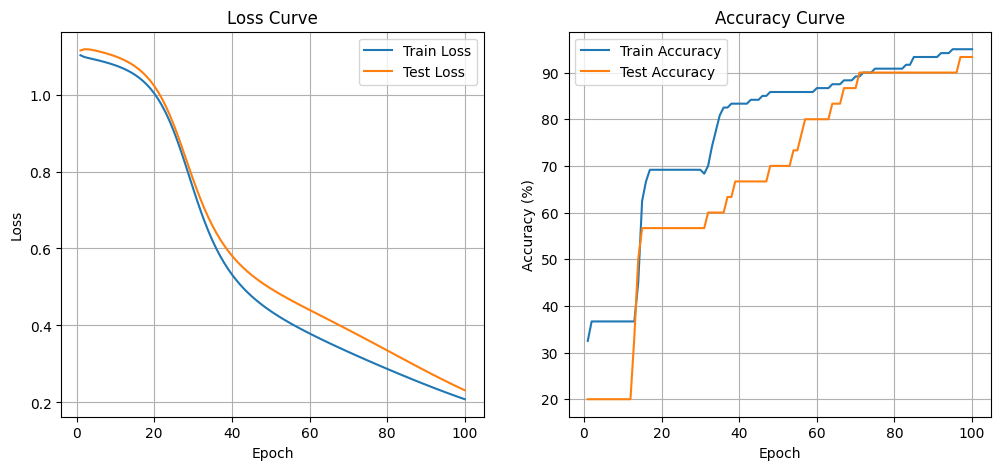

In [8]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accs, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()
plt.grid(True)

plt.show()

# Step 6: Evaluate the Model

=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



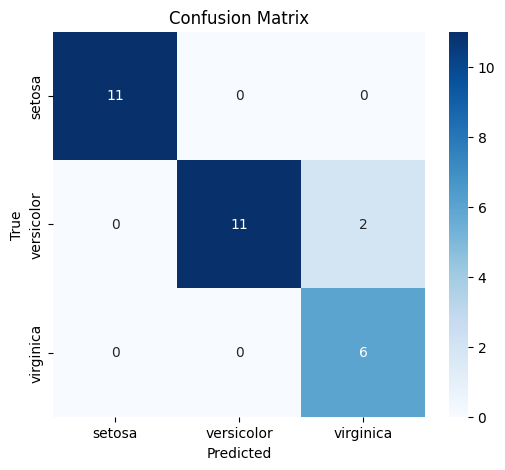

In [9]:
z1 = X_test.dot(W1)
a1 = sigmoid(z1)
z2 = a1.dot(W2)
a2 = sigmoid(z2)
z3 = a2.dot(W3)
a3 = sigmoid(z3)
z4 = a3.dot(W4)
test_preds_probs = softmax(z4)

test_preds_labels = np.argmax(test_preds_probs, axis=1)
test_true_labels = np.argmax(Y_test, axis=1)

print("=== Classification Report ===")
print(classification_report(test_true_labels, test_preds_labels, target_names=iris.target_names))

cm = confusion_matrix(test_true_labels, test_preds_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
